In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
original_data=pd.read_csv("Ultrasound_1.csv")

In [3]:
df=original_data.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [5]:
df.shape

(1577, 577)

In [6]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=577)

In [7]:
#The drop_duplicates function in pandas is used to remove duplicate rows from a DataFrame object.
df.drop_duplicates(inplace = True)
df.shape

(1577, 577)

In [8]:
#To display all the columns
pd.set_option('display.max_columns', None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

In [9]:
#It prints the number of null values present in a given column in descending order
df.isnull().sum().sort_values(ascending = False)

293          1439
292          1439
157          1439
158          1439
358          1351
             ... 
120             0
156             0
495             0
494             0
Pass/Fail       0
Length: 577, dtype: int64

In [10]:
#It will drop all the columns which have a single unique value
df = df.drop(df.columns[df.nunique() == 1], axis=1)

In [11]:
df.shape

(1577, 473)

In [12]:
#it will drop the colums which has nan value greater than 20 percent
#df.shape[0] - tells the no of rows
perc = 50.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [13]:
df.shape

(1577, 445)

In [14]:
df.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,14.82,0.404,7.08,16.977,0.1392,6.32,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0308,0.0193,0.0041,0.0042,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,1.4215,0.0009,0.0184,0.0200,0.0185,0.0068,1.4851,3.6773,2.2494,0.2329,0.0040,1.3352,0.1432,0.0121,79.3662,247.4448,361.1809,68.4513,0.0510,0.0339,0.0555,0.8846,0.1878,0.0196,0.0639,0.3615,0.0519,0.1137,0.1623,0.1137,0.3398,0.0767,0.0927,4.4220,0.1205,2.1717,4.8639,0.0447,1.7369,2.7420,12.7978,0.0729,2.4717,5.0729,0.0910,1.1107,6.4306,2.4717,3.5393,7.3148,0.1352,2.6203,0.0,4.9219,29.4107,0.0,0.0371,0.0337,0.0335,0.0422,0.0317,0.0501,0.0231,0.0498,1.5485,0.0009,0.0132,0.0002,18.7764,0.0193,457.4320,0.0074,0.0053,0.0036,0.0072,0.0016,0.0013,0.0255,0.0068,0.0,43.9254,0.0004,0.8653,0.0087,0.0013,0.1253,0.0262,2.7696,0.8687,6.0503,4.1663,6.4137,2.9181,45.1098,10.6427,4.4950,3.5498,3.6098,0.0000,0.0000,2.1292,2.0314,129.4674,1.679

In [15]:
df.isnull().sum().sort_values(ascending = False)

247          716
519          716
112          716
385          716
563          272
            ... 
526            0
222            0
524            0
523            0
Pass/Fail      0
Length: 445, dtype: int64

In [16]:
#missing value percentage 
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

0            0.317058
1            0.443881
2            0.887762
3            0.887762
4            0.887762
               ...   
586          0.000000
587          0.000000
588          0.000000
589          0.000000
Pass/Fail    0.000000
Length: 445, dtype: float64


In [17]:
#sum of total missing values
df.isna().sum().sum()

10859

In [18]:
#fill the value with median value of each column
df = df.fillna(df.median())

In [19]:
df.isna().sum().sum()

0

In [20]:
df.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,14.82,0.404,7.08,16.977,0.1392,6.32,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0308,0.0193,0.0041,0.0042,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,1.4215,0.0009,0.0184,0.0200,0.0185,0.0068,1.4851,3.6773,2.2494,0.2329,0.0040,1.3352,0.1432,0.0121,79.3662,247.4448,361.1809,68.4513,0.0510,0.0339,0.0555,0.8846,0.1878,0.0196,0.0639,0.3615,0.0519,0.1137,0.1623,0.1137,0.3398,0.0767,0.0927,4.4220,0.1205,2.1717,4.8639,0.0447,1.7369,2.7420,12.7978,0.0729,2.4717,5.0729,0.0910,1.1107,6.4306,2.4717,3.5393,7.3148,0.1352,2.6203,0.0,4.9219,29.4107,0.0,0.0371,0.0337,0.0335,0.0422,0.0317,0.0501,0.0231,0.0498,1.5485,0.0009,0.0132,0.0002,18.7764,0.0193,457.4320,0.0074,0.0053,0.0036,0.0072,0.0016,0.0013,0.0255,0.0068,0.0,43.9254,0.0004,0.8653,0.0087,0.0013,0.1253,0.0262,2.7696,0.8687,6.0503,4.1663,6.4137,2.9181,45.1098,10.6427,4.4950,3.5498,3.6098,0.0000,0.0000,2.1292,2.0314,129.4674,1.679

In [21]:
X = df.loc[:,df.columns != "Pass/Fail"]
X.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,14.82,0.404,7.08,16.977,0.1392,6.32,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0308,0.0193,0.0041,0.0042,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,1.4215,0.0009,0.0184,0.0200,0.0185,0.0068,1.4851,3.6773,2.2494,0.2329,0.0040,1.3352,0.1432,0.0121,79.3662,247.4448,361.1809,68.4513,0.0510,0.0339,0.0555,0.8846,0.1878,0.0196,0.0639,0.3615,0.0519,0.1137,0.1623,0.1137,0.3398,0.0767,0.0927,4.4220,0.1205,2.1717,4.8639,0.0447,1.7369,2.7420,12.7978,0.0729,2.4717,5.0729,0.0910,1.1107,6.4306,2.4717,3.5393,7.3148,0.1352,2.6203,0.0,4.9219,29.4107,0.0,0.0371,0.0337,0.0335,0.0422,0.0317,0.0501,0.0231,0.0498,1.5485,0.0009,0.0132,0.0002,18.7764,0.0193,457.4320,0.0074,0.0053,0.0036,0.0072,0.0016,0.0013,0.0255,0.0068,0.0,43.9254,0.0004,0.8653,0.0087,0.0013,0.1253,0.0262,2.7696,0.8687,6.0503,4.1663,6.4137,2.9181,45.1098,10.6427,4.4950,3.5498,3.6098,0.0000,0.0000,2.1292,2.0314,129.4674,1.6793,7.6113,1

In [22]:
X.shape

(1577, 444)

In [23]:
y = df.loc[:,df.columns == "Pass/Fail" ]
y.head()

,Pass/Fail
0,1
1,-1
2,-1
3,1
4,1


In [24]:
#highly imbalance data and you will not find good accuracy in the minority value
df["Pass/Fail"].value_counts()

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [25]:
df["Pass/Fail"].value_counts(normalize=True)

-1    0.933418
 1    0.066582
Name: Pass/Fail, dtype: float64

# Exploratory Data Analysis

<Axes: title={'center': 'Count of Pass/Fail'}, xlabel='Pass/Fail', ylabel='count'>

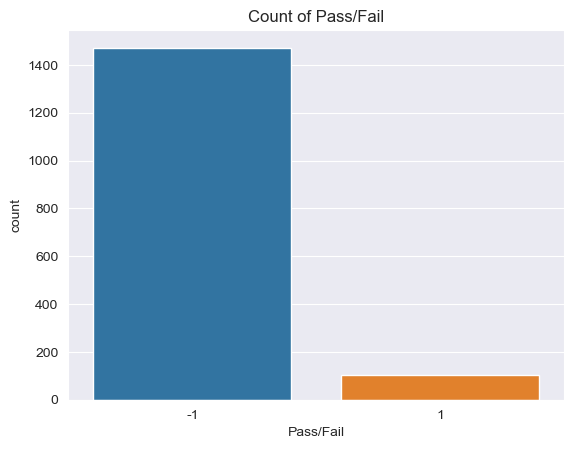

In [26]:
sns.set_style('darkgrid')
plt.title("Count of Pass/Fail")
sns.countplot(x="Pass/Fail",data=df)

In [27]:
#from oversampling we use this
from imblearn.combine import SMOTETomek

In [28]:
#from oversampling we use this
sm = SMOTETomek(random_state = 42)
X,y = sm.fit_resample(X,y)

In [29]:
#nm = NearMiss()
#It will generate the new dependent and indipent feature along with the count and undersampling
#X1,y1 = nm.fit_resample(X,y)

In [30]:
X.shape

(2936, 444)

In [31]:
y.shape

(2936, 1)

In [32]:
y.value_counts()

Pass/Fail
-1           1468
 1           1468
dtype: int64

<Axes: title={'center': 'Count of Pass/Fail after upsampling'}, xlabel='Pass/Fail', ylabel='count'>

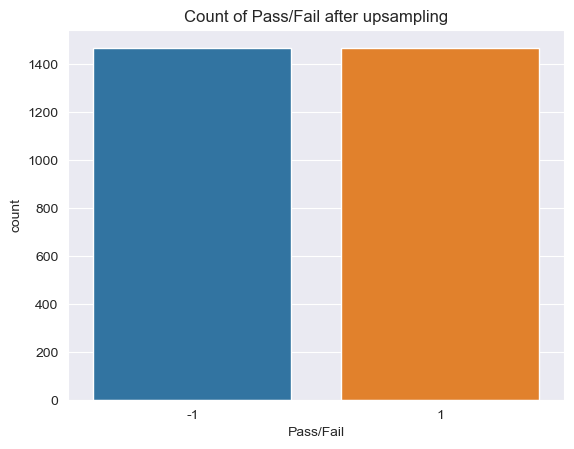

In [33]:
#data after upsampling
sns.set_style('darkgrid')
plt.title("Count of Pass/Fail after upsampling")
sns.countplot(x="Pass/Fail",data=y)

In [84]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV

In [35]:
#we split X and y to remove the data leakage
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size = 0.2,stratify=y)

In [36]:
X_train.shape

(2348, 444)

In [37]:
X_train.corr()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.165987,0.040505,0.059192,-0.008345,-0.085748,0.037667,-0.069771,0.034489,-0.054694,0.141371,-0.057413,0.074322,0.062629,-0.025403,0.057688,-0.045375,0.017098,0.048925,0.043623,-0.013496,0.005799,-0.023278,0.077011,0.035116,0.068118,0.164513,-0.091652,-0.132928,-0.089042,0.003437,-0.059564,-0.017201,-0.016117,0.017200,-0.033048,-0.058058,-0.035049,0.029423,-0.010237,-0.033929,0.065834,0.051737,0.046223,-0.063941,-0.032697,0.008030,-0.089984,0.058809,0.048960,-0.054865,-0.038463,0.014515,-0.071146,-0.145212,0.003384,-0.049080,0.139317,-0.139483,-0.115345,-0.099609,0.113998,-0.009598,-0.006662,0.115680,0.091360,0.081001,0.058857,0.046597,0.159200,-0.187600,0.073666,0.063812,0.067992,0.013660,0.057025,-0.014284,0.063415,-0.093282,0.031281,0.024394,0.021355,-0.024915,-0.003637,0.009574,-0.096346,-0.004434,-0.043287,-0.076438,0.064844,-0.035394,-0.049244,-0.160551,0.072808,0.020345,0.008661,-0.005228,0.046757,-0.046610,0.064612,-0.013630,-0.003907,0.033315,0.005398,-0.064502,-0.064357,-0.021258,0.010543,-0.005624,-0.004773,-0.030332,0.046272,-0.007218,-0.019909,-0.092264,-0.072683,0.063772,0.038299,-0.063788,-0.020120,0.088009,-0.066133,0.167939,0.160785,-0.013816,0.096216,-0.009068,-0.036448,0.032600,0.051073,-0.036197,-0.049249,-0.026080,0.004627,0.018885,-0.017705,0.003665,-0.035451,-0.004985,-0.016593,0.057077,0.003761,0.050075,0.080211,0.082127,0.013265,-0.003909,0.009560,0.070038,0.040800,-0.013256,0.093329,-0.105616,0.023803,-0.009003,0.034708,-0.009061,0.018505,-0.061742,-0.062431,0.046201,0.062893,0.008248,-0.039129,0.060975,-0.022479,0.021241,-0.108295,0.003445,-0.024200,-0.012274,0.013754,-0.003578,-0.047826,-0.070683,-0.035572,-0.002450,-0.014948,-0.056046,0.006621,-0.008090,-0.023329,0.004633,-0.021878,-0.025641,-0.063593,0.060480,-0.046941,0.007362,-0.009385,0.011824,-0.115377,-0.040456,-0.041968,0.012685,0.035782,-0.063467,-0.018487,-0.051738,-0.056883,-0.004383,-0.044492,-0.025897,-0.015750,-0.030915,0.011256,-0.002574,0.019258,0.056441,-0.158532,0.093081,0.024669,0.078095,-0.054516,0.153309,0.147166,0.010461,0.087519,-0.009068,-0.025529,0.040781,0.035270,-0.000507,-0.056379,-0.024082,0.005843,0.000252,-0.021818,0.003729,-0.036705,-0.001206,-0.032747,0.062727,0.006922,0.045874,0.077302,0.072576,0.015986,0.001202,0.012660,0.077213,0.030829,-0.009377,0.084322

In [38]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

248

In [40]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [41]:
X_train.shape

(2348, 196)

In [42]:
X_test.shape

(588, 196)

In [43]:
#MinMmax scaler
#fit_tansform and fit are automatically done inside the pipeline
mm = MinMaxScaler()


In [44]:
#VariacnceThreshold
vt = VarianceThreshold(threshold = 0.01)


In [73]:
pipe = Pipeline([
    ("s2",MinMaxScaler()),
    ("s3",VarianceThreshold(threshold=0.01)),
    ("s4",RandomForestClassifier())
])

In [74]:
#Display Pipeline
from sklearn import set_config
set_config(display = "diagram")

In [75]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('s2', MinMaxScaler()),
                ('s3', VarianceThreshold(threshold=0.01)),
                ('s4', RandomForestClassifier())])

In [76]:
pipe.named_steps

{'s2': MinMaxScaler(),
 's3': VarianceThreshold(threshold=0.01),
 's4': RandomForestClassifier()}

In [77]:
#predicted value
y_pred = pipe.predict(X_test)

In [78]:
y_pred

array([-1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778911564625851

In [80]:
score = cross_val_score(pipe,X_train,y_train,n_jobs=-1,cv = StratifiedKFold(random_state = 0,shuffle = True))
score.mean()

0.9795554144172753

In [81]:
#cross validation in pipeline
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring = "accuracy").mean()

0.9765748763779885

In [82]:
print(confusion_matrix(y_test,y_pred))

[[290   4]
 [  9 285]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       294
           1       0.99      0.97      0.98       294

    accuracy                           0.98       588
   macro avg       0.98      0.98      0.98       588
weighted avg       0.98      0.98      0.98       588



In [93]:
param_grid = { "s4__n_estimators":[1,500] }

In [94]:
grid_search = GridSearchCV(pipe,param_grid=param_grid,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [56]:
# ZERO VARIANCE COLUMN
# Multi col
# Missing value 
#Chi2 test- feature importance
#Hypothesis testing--
#Feature_importance
#Recursive Feature elimination
#VIF

#Reduce the column upto 100.

#Reduce upto 50-60.

In [57]:
# MODEL BUILDING - 
#-->Minority Recall value -- 60%
#-->75%